In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
# Generate Sample Data
num_samples = 100
data = {
    'Drug_ID': np.arange(1, num_samples + 1),
    'Molecular_Weight': np.random.normal(300, 50, num_samples),
    'LogP' : np.random.normal(3, 1, num_samples),
    'Hydrogen_Bond_Donors': np.random.randint(0, 6, num_samples),
    'Hydrogen_Bond_Acceptors': np.random.randint(0, 10, num_samples),
    'Efficacy': np.random.normal(50, 10, num_samples)
}

In [ ]:
# Create DataFrame

df = pd.DataFrame(data)
df.to_csv('drug_data.csv', index=False)

In [ ]:
# Load the dataset
df = pd.read_csv('drug_data.csv')

In [ ]:
df

,Drug_ID,Molecular_Weight,LogP,Hydrogen_Bond_Donors,Hydrogen_Bond_Acceptors,Efficacy
0,1,326.244439,2.869084,0,1,50.281812
1,2,389.081255,1.965045,1,4,49.908810
2,3,256.184067,2.810006,4,4,60.858956
3,4,301.883012,3.448390,1,7,54.746982
4,5,286.540693,2.411236,3,5,49.749730
...,...,...,...,...,...,...
95,96,318.986309,2.840776,0,4,55.366528
96,97,283.655961,2.030800,3,2,61.857042
97,98,272.452594,3.551037,4,1,57.189533
98,99,302.419256,4.846627,0,1,59.960477


In [ ]:
# Handle missing values
df.isnull().sum()

,0
Drug_ID,0
Molecular_Weight,0
LogP,0
Hydrogen_Bond_Donors,0
Hydrogen_Bond_Acceptors,0
Efficacy,0


In [ ]:
# Standardise the columns
columns_to_standardise = ['Molecular_Weight', 'LogP', 'Hydrogen_Bond_Donors', 'Hydrogen_Bond_Acceptors']
scaler = StandardScaler()
df[columns_to_standardise] = scaler.fit_transform(df[columns_to_standardise])

In [ ]:
# ExplOratory Data Analysis (EDA)
df.describe()

,Drug_ID,Molecular_Weight,LogP,Hydrogen_Bond_Donors,Hydrogen_Bond_Acceptors,Efficacy
count,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000
mean,50.500000,1.221245e-17,-2.081668e-17,-8.215650e-17,2.664535e-17,49.911167
std,29.011492,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,9.843543
min,1.000000,-2.378190e+00,-2.218762e+00,-1.315288e+00,-1.582446e+00,24.089577
25%,25.750000,-6.556644e-01,-7.885101e-01,-7.333021e-01,-8.324714e-01,43.757244
50%,50.500000,6.629504e-02,2.921903e-02,-1.513163e-01,-8.249716e-02,49.969635
75%,75.250000,6.948793e-01,6.232800e-01,1.012655e+00,6.674771e-01,56.194280
max,100.000000,2.959140e+00,2.887826e+00,1.594641e+00,1.792438e+00,71.573082


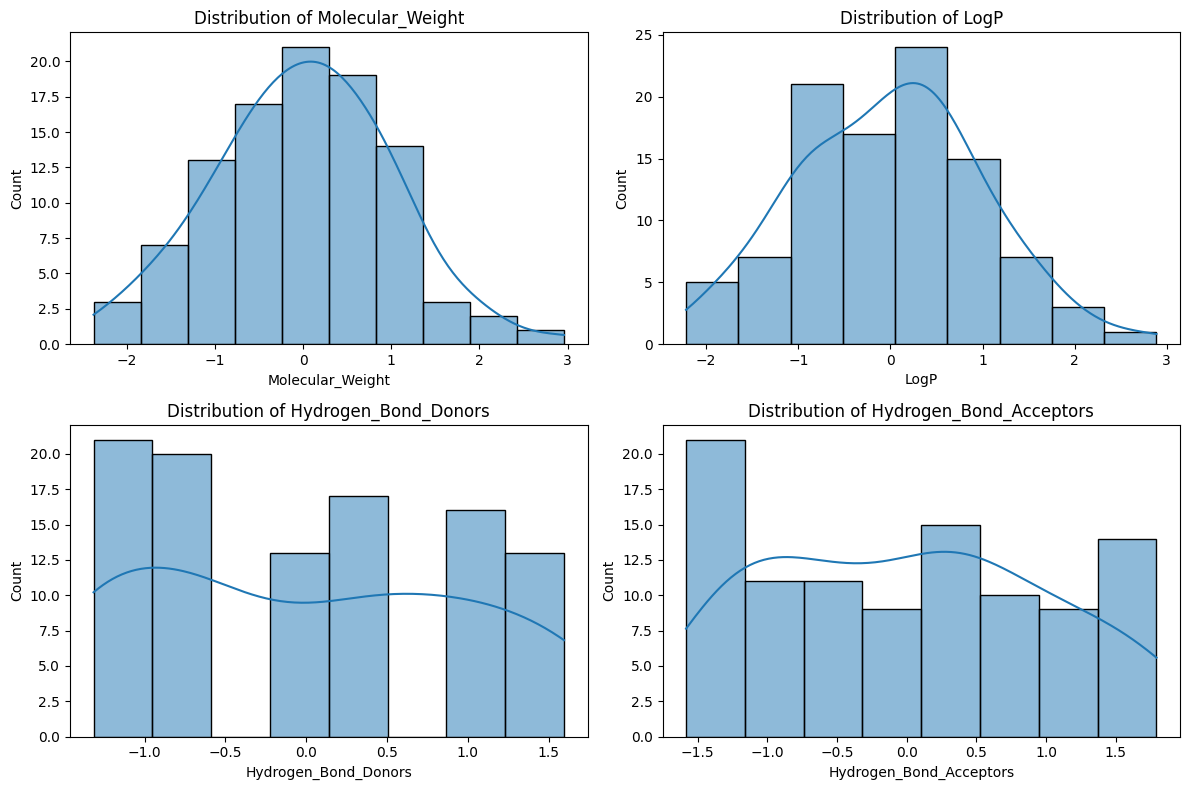

In [ ]:
plt.figure(figsize=(12,8))
for i, column in enumerate(columns_to_standardise):
  plt.subplot(2, 2, i + 1)
  sns.histplot(df[column], kde=True)
  plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

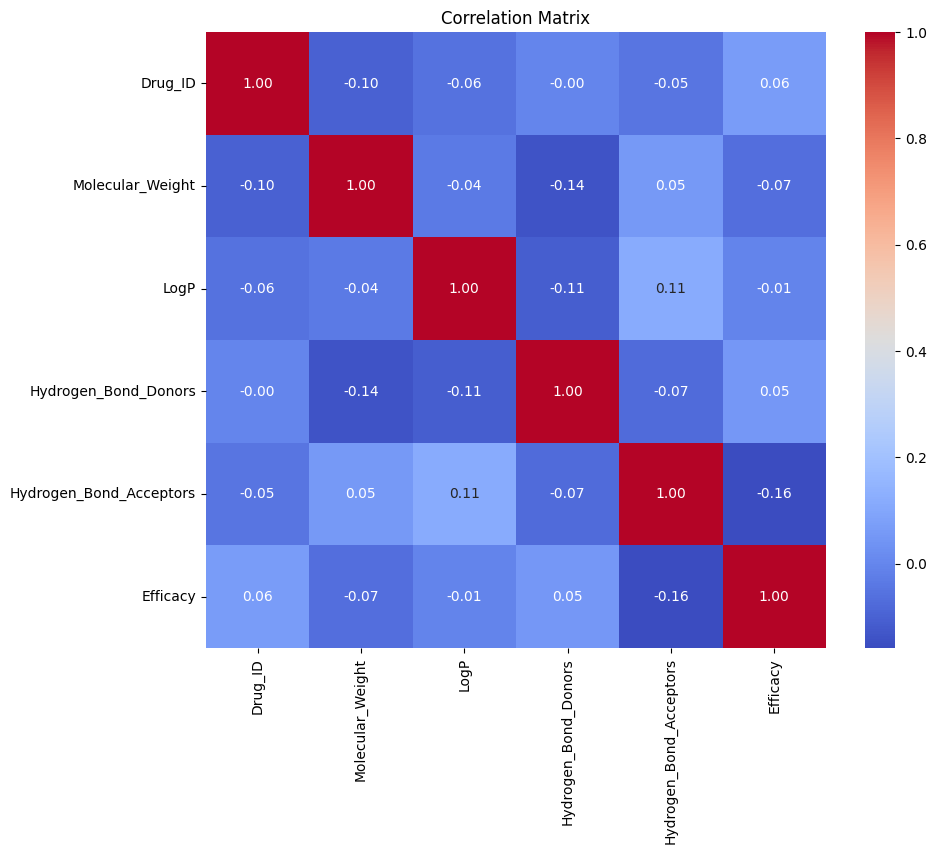

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
correlation_with_efficacy = correlation_matrix['Efficacy'].sort_values(ascending=False)
correlation_with_efficacy

,Efficacy
Efficacy,1.000000
Drug_ID,0.064629
Hydrogen_Bond_Donors,0.053184
LogP,-0.005512
Molecular_Weight,-0.065520
Hydrogen_Bond_Acceptors,-0.159170


In [ ]:
X = df[columns_to_standardise]
y = df['Efficacy']

In [ ]:
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)
scores = selector.scores_

feature_scores = pd.DataFrame({'Feature': columns_to_standardise, 'Score':scores})
featire_scores = feature_scores.sort_values(by='Score', ascending=False)
feature_scores

,Feature,Score
0,Molecular_Weight,0.422519
1,LogP,0.002978
2,Hydrogen_Bond_Donors,0.277987
3,Hydrogen_Bond_Acceptors,2.547364


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression' : LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR()
}

results = {}
for model_name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  results[model_name] = {'MSE': mse, 'R2' : r2}


results_df = pd.DataFrame(results).T
results_df

,MSE,R2
Linear Regression,122.885076,-0.145760
Random Forest,110.985021,-0.034806
Support Vector Machine,125.802505,-0.172962


In [ ]:
# Random Forest Regresssor
best_model = RandomForestRegressor(random_state=42)
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
cv_scores_mean = np.mean(cv_scores)
cv_scores_mean

-0.3940668474782199

In [ ]:
best_model.fit(X, y)
feature_importances = best_model.feature_importances_

importance_df = pd.DataFrame({'Feature' : columns_to_standardise, 'Importance' : feature_importances})
importance_df = importance_df.sort_values(by= 'Importance', ascending=False)
importance_df

,Feature,Importance
1,LogP,0.380087
0,Molecular_Weight,0.368468
3,Hydrogen_Bond_Acceptors,0.149953
2,Hydrogen_Bond_Donors,0.101492


<function matplotlib.pyplot.show(close=None, block=None)>

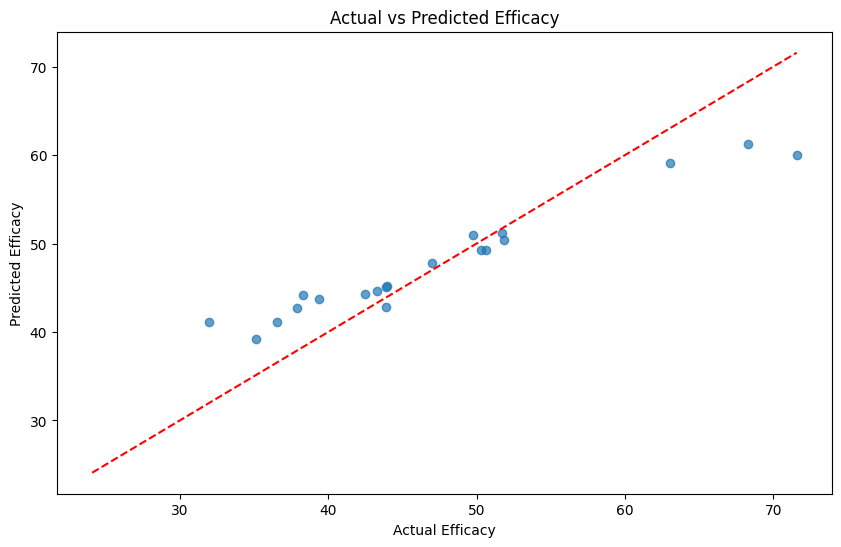

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model.predict(X_test), alpha=0.7)
plt.xlabel('Actual Efficacy')
plt.ylabel('Predicted Efficacy')
plt.title("Actual vs Predicted Efficacy")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show

In [ ]:
summary = {
    'Best Model': 'Random Forest Regressor',
    'Mean Cross-Validation R2 Score': cv_scores_mean,
    'Feature Importances' : importance_df
}


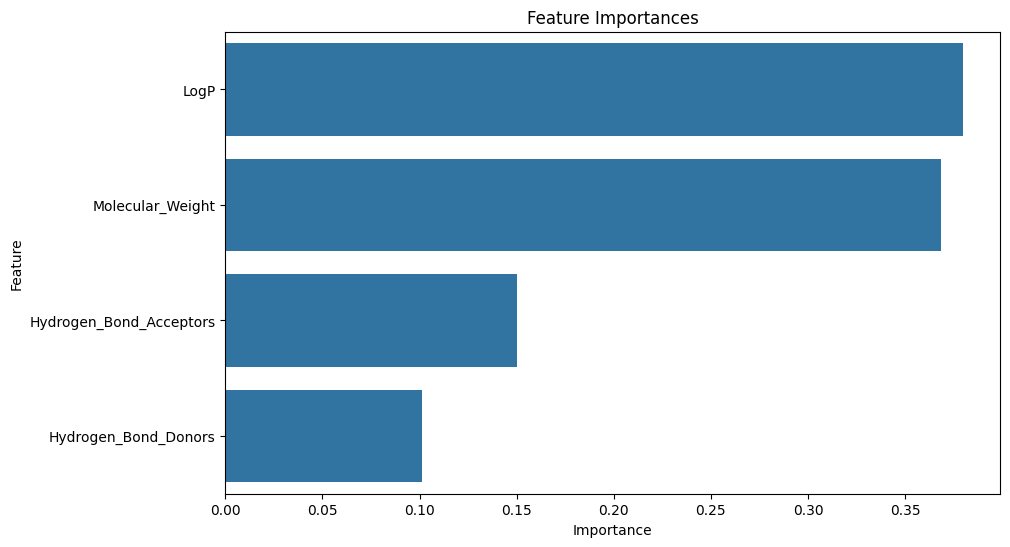

,MSE,R2
Linear Regression,122.885076,-0.145760
Random Forest,110.985021,-0.034806
Support Vector Machine,125.802505,-0.172962


In [ ]:
summary
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

results_df